# Comitês

In [178]:
import numpy as np # Numpy: biblioteca para manipular vetores e matrizes
import pandas as pd # Pandas: biblioteca para manipular tabelas
import scipy.stats as ss

In [179]:
lista = ['V1_size','V2_size','V3_size','V4_size','V5_size','V6_size','V7_size','V8_size','V9_size','V1_interval','V2_interval','V3_interval','V4_interval','V5_interval','V6_interval','V7_interval','V8_interval','V9_interval','classe']

test = []
train = []

for i in range(4,7):
    test.append(pd.read_csv(f'./dataset/dataset{i}_teste.csv', sep = ',', names=lista)) 
    train.append(pd.read_csv(f'./dataset/dataset{i}_treino.csv', sep = ',', names=lista))
    print(f"Tamanho df teste {i}: ",len(test[-1]))
    print(f"Tamanho df treino {i} : ",len(train[-1]))

frames = train + test
df_train1 = pd.concat(frames)
 

Tamanho df teste 4:  1063
Tamanho df treino 4 :  10600
Tamanho df teste 5:  1351
Tamanho df treino 5 :  13513
Tamanho df teste 6:  7
Tamanho df treino 6 :  66


In [180]:
print(df_train1.shape)

(26600, 19)


In [181]:
df_train1.head(1000)

,V1_size,V2_size,V3_size,V4_size,V5_size,V6_size,V7_size,V8_size,V9_size,V1_interval,V2_interval,V3_interval,V4_interval,V5_interval,V6_interval,V7_interval,V8_interval,V9_interval,classe
0,0.000438,0.002101,0.000006,0.000003,6.5008,42.76100,0.016319,0.000003,0.002136,759.62,477.050,1130.0,0.000,-0.505190,-1.74200,1130,61,895.730,1
1,0.000388,0.000783,0.000130,0.000090,2.4140,3.95440,0.002615,0.000000,0.000870,86.32,35.631,62.0,0.000,0.760200,-1.43620,138,62,93.317,1
2,0.000142,0.000174,0.000100,0.000147,1.3829,0.91272,0.000585,0.000000,0.000224,103.47,40.320,138.0,22.239,-0.036313,-1.95700,153,62,110.970,1
3,0.000645,0.001331,0.000145,0.000073,3.9211,21.45700,0.009911,0.000007,0.001473,81.76,33.504,62.0,0.000,1.077900,-0.84623,138,62,88.295,1
4,0.000171,0.000218,0.000126,0.000053,2.6358,6.42960,0.000961,0.000003,0.000277,86.32,35.631,62.0,0.000,0.760200,-1.43620,138,62,93.317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000183,0.000288,0.000113,0.000166,2.2656,3.90820,0.001080,0.000000,0.000340,98.48,38.161,62.0,0.000,0.078866,-2.01360,138,62,105.550,1
996,0.000411,0.000827,0.000111,0.000153,2.2146,3.09680,0.002736,0.000003,0.000919,101.52,38.161,138.0,0.000,-0.078866,-2.01360,138,62,108.390,1
997,0.000273,0.001040,0.000021,0.000027,8.5203,77.42500,0.010123,0.000003,0.001070,103.80,38.000,138.0,0.000,-0.198000,-1.98030,138,62,110.470,1
998,0.000189,0.000273,0.000117,0.000159,2.1823,3.61670,0.001037,0.000004,0.000331,93.16,37.568,62.0,0.000,0.360500,-1.88860,138,62,100.380,1


In [182]:
import seaborn as sns
df_train1.classe.value_counts(normalize=True).round(3)

1    0.533
0    0.467
Name: classe, dtype: float64

In [183]:
df_train_noduplicates = df_train1.drop_duplicates()

In [184]:
print(f'Resultante com duplicados {df_train1.shape}')
print(f'Resultante sem duplicados {df_train_noduplicates.shape}')
print(f'Total de valores duplicados: {df_train_noduplicates.shape[0]-df_train1.shape[0]}')

Resultante com duplicados (26600, 19)
Resultante sem duplicados (23181, 19)
Total de valores duplicados: -3419


In [185]:
y= df_train_noduplicates.classe.to_numpy()

In [186]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [187]:
from collections import Counter
print(Counter(y))

Counter({1: 14171, 0: 9010})


### Balanceando

In [188]:
from imblearn.under_sampling import RandomUnderSampler
df_train_noduplicates = df_train_noduplicates.drop(['classe'], axis=1)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_balanced, y_balanced = undersample.fit_resample(df_train_noduplicates, y)
from collections import Counter
print(Counter(y_balanced))

Counter({0: 9010, 1: 9010})


### Normalizando por padronização



In [189]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
Xstd = scaler.fit_transform(X_balanced)
df_balanced_stand = pd.DataFrame(Xstd, columns=X_balanced.columns, index=X_balanced.index)
df_balanced_stand

,V1_size,V2_size,V3_size,V4_size,V5_size,V6_size,V7_size,V8_size,V9_size,V1_interval,V2_interval,V3_interval,V4_interval,V5_interval,V6_interval,V7_interval,V8_interval,V9_interval
0,-0.059395,-0.039940,-0.011665,-0.060443,-0.481651,-0.587463,-0.036360,0.262687,-0.040435,-0.823544,-0.027083,-0.996750,-0.502069,1.469716,0.096092,0.511857,0.309694,-0.685813
1,0.008033,-0.018646,-0.008339,-0.000551,0.281522,-0.003866,-0.021938,0.262687,-0.018013,-0.872977,-0.583985,-0.967817,-0.353845,2.016423,1.005890,0.511857,0.309694,-0.888569
2,-0.020335,-0.006498,-0.015276,-0.110116,2.456077,2.869927,-0.002505,0.306358,-0.006964,-0.706801,-0.300256,-0.993704,-0.486466,0.829571,-0.282779,0.024672,0.309694,-0.684354
3,0.226495,0.048878,-0.015532,-0.116576,0.325112,0.237873,0.033205,0.204459,0.053283,-0.785736,-0.490509,-0.935078,-0.186115,1.109103,-0.110765,-0.050872,0.309694,-0.795671
4,-0.045878,-0.033206,-0.013962,-0.095822,1.427782,1.451638,-0.030061,0.248130,-0.033603,0.704342,0.913665,1.083354,-0.439657,-0.025519,-0.447023,0.696864,0.348425,0.750464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18015,-0.061126,-0.040267,-0.015470,-0.111533,-0.830334,-0.708894,-0.036591,-0.591172,-0.040811,0.252859,1.231982,0.769663,0.527695,0.080055,-0.261181,0.662946,-0.632739,0.470712
18016,-0.061120,-0.040293,-0.015271,-0.108600,-0.949006,-0.762913,-0.036605,-0.594440,-0.040834,0.019955,1.546307,-1.200801,-0.408453,0.308749,-0.268965,0.718448,-0.632739,0.400682
18017,-0.062289,-0.040507,-0.015945,-0.119024,2.178058,2.525088,-0.036661,-0.581615,-0.041080,-1.248981,-1.235664,-1.124663,-0.502069,-0.346745,-0.356833,-1.550969,-0.723110,-1.340934
18018,-0.061838,-0.040360,-0.015918,-0.118604,-0.050644,-0.241498,-0.036605,-0.591863,-0.040926,0.646504,1.275477,1.116855,-0.502069,-0.068223,-0.231382,0.718448,-0.632739,0.787850


In [190]:
X = df_balanced_stand
y = y_balanced
print(f'X:{X.shape} y:{y.shape} ')

X:(18020, 18) y:(18020,) 


In [191]:
from sklearn.model_selection import train_test_split
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1, stratify=y)

print(f'X_train:{X_train.shape} y_train:{y_train.shape} ')
print(Counter(y_train))
print(f'X_test:{X_test.shape} y_test:{y_test.shape} ')
print(Counter(y_test))

X_train:(7208, 18) y_train:(7208,) 
Counter({0: 3604, 1: 3604})
X_test:(10812, 18) y_test:(10812,) 
Counter({0: 5406, 1: 5406})


### Testing with knn 



In [195]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

#skf = StratifiedKFold(n_splits=3)
#skf.get_n_splits(X, y)

#print(skf)

knn3 = KNeighborsClassifier(n_neighbors=3, p=1) 

#for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, f'shape {train_index.shape}' ,"TEST:", test_index,f'shape {test_index.shape}'  )
    # spliting dataset
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]
    
print('Fitting data')
knn3.fit(X_train, y_train)
print('Predicting data')
ypredicted = knn3.predict(X_test)
print(np.count_nonzero(y_test == ypredicted), f"out of {ypredicted.shape}")
print(accuracy_score(ypredicted, y_test))


Fitting data
Predicting data
10807 out of (10812,)
0.9995375508694043


## Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)
seed = 17

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
seed = 17
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [198]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

algorithms = {
    'tree':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [3, 4, 5],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'kNN':  GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),
    'nb': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            ('selector', SelectKBest()),
            ('nb', GaussianNB())]), 
        param_grid={
            'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            #('imputer', SimpleImputer(strategy='mean')),
            #('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

In [199]:
import time

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
# df_balanced_stand, y_balanced 
result = {}
result_score = {}
i = 1
# X_train, X_test, y_train, y_test

for alg, clf in algorithms.items():
    start = time.time()
    print(f'Train with algorithm {i}: {alg}')
    i += 1
    result[alg] = cross_validate(clf, X_train, y_train, n_jobs= -1, verbose = 1)
    #result_score[alg] = cross_val_score(clf, X, y)
    print(result[alg])
    print(f"it took {time.time() - start} seconds.")

Train with algorithm 1: tree


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.49090672, 0.49635601, 0.49481177, 0.49963593, 0.28360009]), 'score_time': array([0.00294018, 0.00364804, 0.00336838, 0.004951  , 0.00213194]), 'test_score': array([0.99930652, 1.        , 1.        , 1.        , 1.        ])}
it took 5.658105850219727 seconds.
Train with algorithm 2: bigtree


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.15883303, 0.1746707 , 0.1714592 , 0.18693781, 0.16292095]), 'score_time': array([0.00427389, 0.01985216, 0.00479984, 0.01054525, 0.00266528]), 'test_score': array([0.99930652, 1.        , 1.        , 1.        , 1.        ])}
it took 0.35564422607421875 seconds.
Train with algorithm 3: kNN


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([30.42412996, 30.31065989, 30.01438785, 30.62735891, 14.9002099 ]), 'score_time': array([1.04106593, 0.85259628, 0.62546897, 0.88431478, 0.25960708]), 'test_score': array([0.99861304, 0.99861304, 0.99930652, 1.        , 0.99930604])}
it took 45.97307586669922 seconds.
Train with algorithm 4: nb


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([0.27415299, 0.27621794, 0.27603722, 0.24465108, 0.12654495]), 'score_time': array([0.00553918, 0.00443602, 0.00563002, 0.00285673, 0.0024941 ]), 'test_score': array([0.99861304, 0.99861304, 0.99514563, 0.99861207, 0.99791811])}
it took 0.4595789909362793 seconds.
Train with algorithm 5: svmlinear


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'fit_time': array([10.86446404, 10.1575098 , 10.64403391, 10.67520094,  5.3830092 ]), 'score_time': array([0.00629401, 0.00835299, 0.00759721, 0.008075  , 0.00948095]), 'test_score': array([0.99930652, 1.        , 1.        , 1.        , 1.        ])}
it took 15.590086936950684 seconds.
Train with algorithm 6: svmrbf


In [159]:
from sklearn.model_selection import cross_val_predict, cross_val_score
# df_balanced_stand, y_balanced 
result = {}
result_score = {}
i = 1
# X_train, X_test, y_train, y_test

for alg, clf in algorithms.items():
    start = time.time()
    print(f'Train with algorithm {i}: {alg}')
    i += 1
    result[alg] = cross_val_predict(clf, X_train, y_train)
    #result_score[alg] = cross_val_score(clf, X, y)
    #print(result_score)
    print(f"it took {time.time() - start} seconds.")

Train with algorithm 1: tree
it took 2.1525657176971436 seconds.
Train with algorithm 2: bigtree
it took 0.7268269062042236 seconds.
Train with algorithm 3: kNN
it took 248.53992700576782 seconds.
Train with algorithm 4: nb
it took 0.739300012588501 seconds.
Train with algorithm 5: svmlinear
it took 58.26070713996887 seconds.
Train with algorithm 6: svmrbf
it took 261.29730772972107 seconds.


In [120]:
result = pd.DataFrame.from_dict(result)
result.shape


(18020, 6)

In [164]:
def phi(a, b, expected):
    errors = np.logical_or(a != expected, b != expected)
    try:
        return np.count_nonzero(np.logical_and(a == b, errors)) / np.count_nonzero(errors)
    except:
        return 0

# X_balanced, y_balanced
correrrors = np.ones((len(algorithms), len(algorithms)))

for i in range(len(algorithms)):
    for j in range(i + 1, len(algorithms)):
        correrrors[i, j] = phi(result[result.columns[i]], result[result.columns[j]], y_balanced)
        correrrors[j, i] = correrrors[i, j]    
        
print(correrrors)

AttributeError: 'dict' object has no attribute 'columns'

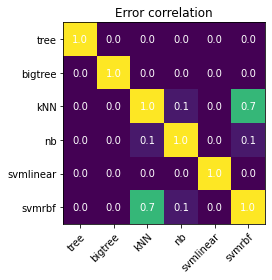

In [122]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
im = ax.imshow(correrrors)

ax.set_xticks(np.arange(len(result.columns)))
ax.set_yticks(np.arange(len(result.columns)))
ax.set_xticklabels(result.columns)
ax.set_yticklabels(result.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(result.columns)):
    for j in range(len(result.columns)):
        text = ax.text(j, i, round(correrrors[i, j], 1),
                       ha="center", va="center", color="w")

ax.set_title("Error correlation")
fig.tight_layout()
plt.show()

## Todos são melhores que a média?

In [123]:
# random classifier
mode = lambda x: ss.mode(x).mode[0]
random = np.mean(mode(y) == y)
print(random)

0.5


In [124]:
result.apply(lambda ypred: np.mean(ypred == y_balanced))

tree         1.000000
bigtree      1.000000
kNN          0.999723
nb           0.997614
svmlinear    0.999945
svmrbf       0.999723
dtype: float64

## Combinando classificadores

In [125]:
result['kNN+tree+svmrbf'] = result.filter(['kNN', 'tree', 'svmrbf']).apply(mode, axis=1)
result['nb+svmlinear+svmrbf'] = result.filter(['nb', 'svmlinear', 'svmrbf']).apply(mode, axis=1)
result['kNN+bigtree+svmrbf'] = result.filter(['kNN', 'bigtree', 'svmrbf']).apply(mode, axis=1)

In [126]:
result.apply(lambda ypred: np.mean(ypred == y_balanced))

tree                   1.000000
bigtree                1.000000
kNN                    0.999723
nb                     0.997614
svmlinear              0.999945
svmrbf                 0.999723
kNN+tree+svmrbf        0.999778
nb+svmlinear+svmrbf    0.999834
kNN+bigtree+svmrbf     0.999778
dtype: float64

**nota**: podem existir outros casos de melhoras/pioras.

# Bagging, boosting, etc

In [129]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [130]:
algorithms = {
    'bagging':  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', BaggingClassifier(random_state=seed))]),
    'forest':  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', RandomForestClassifier(random_state=seed))]),
    #'kNN+tree+svmrbf':
    #    VotingClassifier([ ])
    # Testar outros
}

In [131]:
from sklearn.model_selection import cross_val_predict

for alg, clf in algorithms.items():
  result[alg] = cross_val_predict(clf, X, y, cv=cv)

In [132]:
result.apply(lambda ypred: np.mean(ypred == y))

tree                   1.000000
bigtree                1.000000
kNN                    0.999723
nb                     0.997614
svmlinear              0.999945
svmrbf                 0.999723
kNN+tree+svmrbf        0.999778
nb+svmlinear+svmrbf    0.999834
kNN+bigtree+svmrbf     0.999778
bagging                1.000000
forest                 1.000000
dtype: float64

### Rede neural
X_train, X_test, y_train, y_test

In [66]:
from sklearn.neural_network import MLPClassifier
from skimage.transform import resize

In [67]:
from sklearn.preprocessing import StandardScaler

In [166]:
model = MLPClassifier(hidden_layer_sizes=(10, 2),
                      activation='relu',
                      solver='adam',
                      max_iter=30,
                      random_state=17,
                      early_stopping=True,
                      #verbose= True,
                      validation_fraction=0.1)
model.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 2), max_iter=30,
              random_state=17)

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
ypredicted = model.predict(X_test)

In [169]:
ypredicted

array([0, 1, 0, ..., 1, 0, 0])

In [170]:
y_test

array([0, 1, 0, ..., 1, 0, 0])

In [171]:
print(accuracy_score(ypredicted, y_test))

0.9956529781724011


In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
print(cross_val_score(model, X, y))

[0.99750277 0.99528302 0.99916759 0.99667037 0.99500555]
